# Prediting a salary (focusing on pre-modeling)

### Outline of this project
[**1.Introduction - Problem Definition**](#part1)

[**2. Pre-Modeling**](#part2)
   - [2.1. Data exploration (Exploratory data analysis or EDA)](#2.1)
       - [A. General statistic of our dataset](#2.1a)
       - [B. Explore details of each feature and correct the missing information](#2.1b)
       - [C. Analysze by visualizing relation of combined features](#2.1c)
   - [2.2. Data cleaning](#2.2)
       - [A. Handling data type](#2.2a)
       - [B. Outlier detection](#2.2b)
       - [C. Missing values](#2.2c)
    
[**3. Model building**](#part3)
   - [3.1. Selecting models](#3.1)
   - [3.2. Hyperparameter tuning](#3.2)
   - [3.3. Evaluate results and choose the best model](#3.3)
      
[**4. Conlusion**](#part4)

[**References**](#ref)


<a id="part1"></a>

# 1. Introduction - Problem Definition

According to [[1]](https://www.infoworld.com/article/3228245/the-80-20-data-science-dilemma.html),80 percent of a data scientist’s valuable time is spent simply finding, cleaning and reorganizing huge amounts of data. Moreover, the quality of pre-modeling data such as: data preprocessing, feature exploration, feature engineering dirrectly affect to the performance of machine learning model. Therefore, in this project, I want to pay attention to `pre-modeling steps`. 

The data used in this project was extracted from the census [bureau database](http://www.census.gov). The original database came from the [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult) from UCI Machine Learning Repository.

The bussiness problem of this project is to clasify a salary of person. This is binary classification problem if an income of a person greater or smaller than a threshold value (50k USD). This problem could be applied to a recommendation system of some online e-commerce sites such as Amazon or Rakuten. If a person's income is below a certain threshold salary, the product suggestion system will adjust suggested products according to her/him salary in the way that he/she are more likely to purchase the product. Another business case of this problem is understanding and segmenting a customer to pay more attention to some specific group of customers in promotional campaigns or introdution of new products.

> **In this project, I will analyze the data carefully to find correlations between an income with other factors, then pre-process the data and build a machine learning model. This is end-to-end binary classification problem.**

In [1]:
# Import some necessary libaries for
# Data manipulation
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import missingno
from pandas.plotting import scatter_matrix

import time
import math
import warnings, os
warnings.filterwarnings("ignore")

In [2]:
# Function to save a figure
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "project-images")
os.makedirs(IMAGES_PATH, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
# Load train and test data
train_df = pd.read_csv("adult-data.csv")
test_df = pd.read_csv("adult-test.csv")
#Join train and test data into bigger dataset
df_raw = train_df.append(test_df)
df_raw.reset_index(inplace=True)
df_raw.drop('index',inplace=True,axis=1)
# Check a shape of data
print("Shape of the dataset: ",df_raw.shape)

Shape of the dataset:  (48842, 15)


<a id="part2"></a>

# 2. Pre-Modeling

<a id="2.1"></a>

## 2.1 Data Exploration (Exploratory data analysis or EDA)

<a id="2.1a"></a>
### A. General statistic of our dataset

In [4]:
df_raw.head()

,Age,Workclass,Final weight,Education,Education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df_raw["income"].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [6]:
# We cannot put the categorical into our machine learning model so we need to map the outcome
map_values = {' <=50K':0,' <=50K.':0, ' >50K':1,' >50K.':1}
df_raw['income'] = df_raw['income'].map(map_values)

In [7]:
# Take a look at the label
print("=="*20)
print(df_raw["income"].value_counts())
print("=="*20)
print(df_raw["income"].value_counts(normalize=True))
print("=="*20)

0    37155
1    11687
Name: income, dtype: int64
0    0.760718
1    0.239282
Name: income, dtype: float64


In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48842 non-null  int64 
 1   Workclass       48842 non-null  object
 2   Final weight    48842 non-null  int64 
 3   Education       48842 non-null  object
 4   Education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.6+ MB


In [9]:
df_raw.describe(exclude='object')

,Age,Final weight,Education-num,capital-gain,capital-loss,hours-per-week,income
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.239282
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.426649
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [10]:
df_raw.describe(include='object')

,Workclass,Education,marital-status,occupation,relationship,race,sex,native-country
count,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,33906,15784,22379,6172,19716,41762,32650,43832


In [12]:
# Check the missing values in this dataset
df_raw.isnull().sum().sort_values(ascending=False)

income            0
native-country    0
hours-per-week    0
capital-loss      0
capital-gain      0
sex               0
race              0
relationship      0
occupation        0
marital-status    0
Education-num     0
Education         0
Final weight      0
Workclass         0
Age               0
dtype: int64

<a id="2.1b"></a>
### B. Explore details of each independent columns (not our label) and correct the missing information

In this dataset we have 14 input columns, and a detail for all input columns which are the independent columns (ussually called as **attributes** or **features**) to predict our label (target values) are described as followed:
    1. age: continuous value.
    2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
    3. fnlwgt: final weight - continuous value. The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US.  These are prepared monthly for us by Population Division here at the Census Bureau.
    4. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
    5. education-num: continuous.
    6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
    7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
    8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
    9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
    10. sex: Female, Male.
    11. capital-gain: continuous.
    12. capital-loss: continuous.
    13. hours-per-week: continuous.
    14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

> **This dataset contains only 14 features, and each feature will be explored in details and correct missing information and missspeeling words. If dataset contains too many features, it is impossible to explore them in details and we should use alterative methods.**

In [13]:
# Create a data frame for pre-processing to avoid any changes into the original data
df = df_raw.copy()

In [14]:
print(df.columns)

Index(['Age', 'Workclass', 'Final weight', 'Education', 'Education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


### Feature: Age

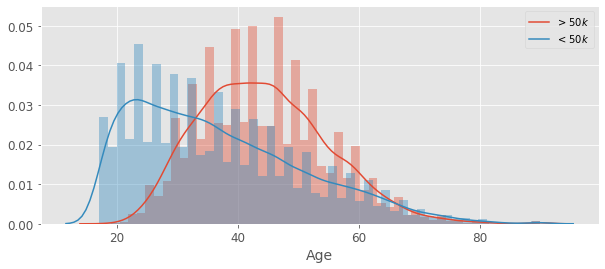

In [15]:
plt.figure(figsize=(10,4))
sns.distplot(df.loc[df['income'] == 1]['Age'], kde_kws={'label':'> $50k$'})
sns.distplot(df.loc[df['income'] == 0]['Age'], kde_kws={'label':'< $50k$'})
plt.show()

### Feature: Workclass

In the Workclass feature, we have 9 unique values, however those values seem messy. There is '?' which is unknown value. 
> I decided to group similar values into bigger groups, and change '?' into unknown group. After grouping, you can only see 5 clean group of Workclass.

In [16]:
df['Workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

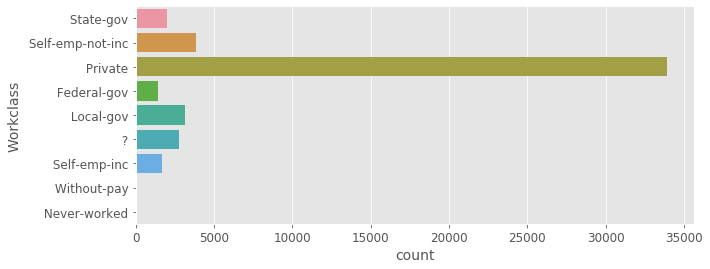

In [17]:
plt.figure(figsize=(10,4))
sns.countplot(y='Workclass',data=df)
plt.show()

In [18]:
# Try to find similar properties in '?' values in Workclass feature, however there are no common properties for the value
df[df['Workclass']==' ?'].head()

,Age,Workclass,Final weight,Education,Education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,1
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,0
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,0
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,0
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,0


In [19]:
df['Workclass'][df['Workclass'] == ' Without-pay'] = 'Not Working'
df['Workclass'][df['Workclass'] == ' Never-worked'] = 'Not Working'
df['Workclass'][df['Workclass'] == ' Local-gov'] = 'Government sector'
df['Workclass'][df['Workclass'] == ' State-gov'] = 'Government sector'
df['Workclass'][df['Workclass'] == ' Federal-gov'] = 'Government sector'
df['Workclass'][df['Workclass'] == ' Self-emp-not-inc'] = 'Self employment'
df['Workclass'][df['Workclass'] == ' Self-emp-inc'] = 'Self employment'
df['Workclass'][df['Workclass'] == ' Private'] = 'Self employment'
df['Workclass'][df['Workclass'] == ' ?'] = 'No information'

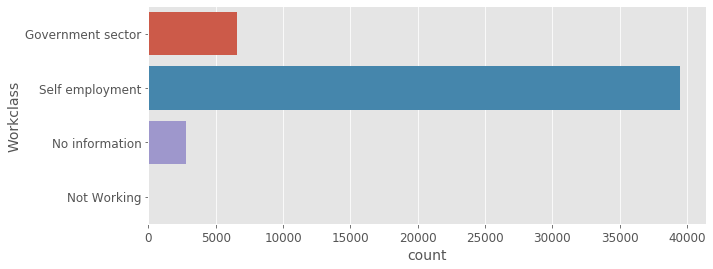

In [20]:
plt.figure(figsize=(10,4))
sns.countplot(y='Workclass',data=df)
plt.show()

### Feature: Final weight

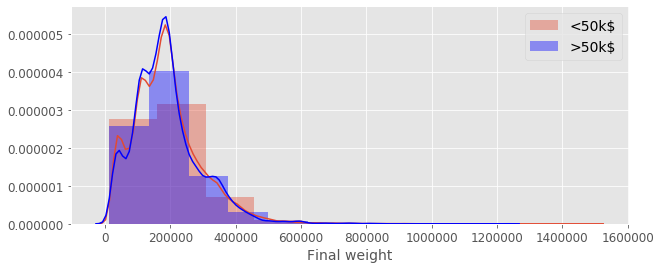

In [21]:
# df['Final weight'] = pd.cut(df['Final weight'], 10)
fig = plt.figure(figsize=(10,4)) 
sns.distplot(df['Final weight'][df['income']==0],bins=10,label='<50k$')
sns.distplot(df['Final weight'][df['income']==1],bins=10,color='b',label='>50k$')
plt.legend(fontsize=14)
plt.show()

### Feature: Education

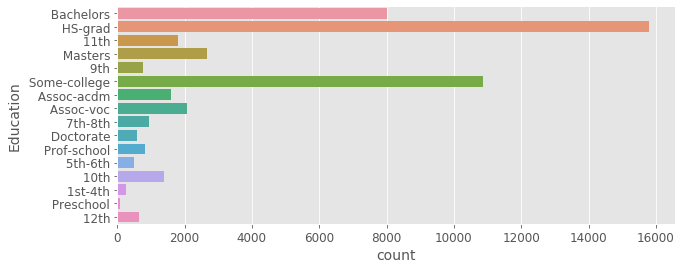

In [22]:
fig = plt.figure(figsize=(10,4)) 
sns.countplot(y="Education",data=df);plt.show()

In [23]:
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [24]:
df['Education'][df['Education'] == ' Bachelors'] = 'Bachelors'
df['Education'][df['Education'] == ' HS-grad'] = 'High school'
df['Education'][df['Education'] == ' 11th'] = 'Dropout'
df['Education'][df['Education'] == ' 9th'] = 'Dropout'
df['Education'][df['Education'] == ' Some-college'] = 'High school'
df['Education'][df['Education'] == ' Assoc-acdm'] = 'Associate'
df['Education'][df['Education'] == ' Assoc-voc'] = 'Associate'
df['Education'][df['Education'] == ' 7th-8th'] = 'Dropout'
df['Education'][df['Education'] == ' Doctorate'] = 'Doctorate'
df['Education'][df['Education'] == ' Prof-school'] = 'Professor School'
df['Education'][df['Education'] == ' 5th-6th'] ='Dropout'
df['Education'][df['Education'] == ' 10th'] = 'Dropout'
df['Education'][df['Education'] == ' 1st-4th'] = 'Dropout'
df['Education'][df['Education'] == ' Preschool'] = 'Dropout'
df['Education'][df['Education'] == ' 12th'] = 'Dropout'

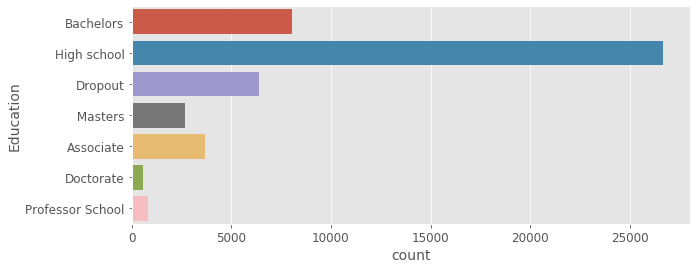

In [25]:
fig = plt.figure(figsize=(10,4)) 
sns.countplot(y="Education",data=df);plt.show()

### Feature: Education number

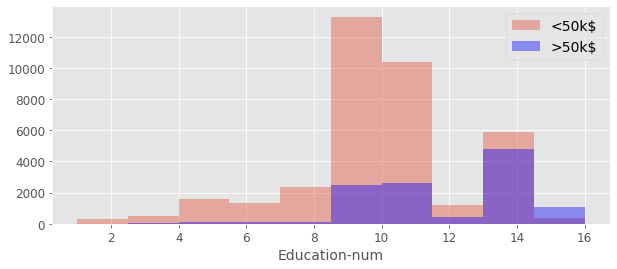

In [26]:
# Change the data into 10 equal distance
# df['Education-num'] = pd.cut(df['Education-num'], 10)
fig = plt.figure(figsize=(10,4)) 
sns.distplot(df['Education-num'][df['income']==0],bins=10,kde=False,label='<50k$')
sns.distplot(df['Education-num'][df['income']==1],bins=10,kde=False,color='b',label='>50k$')
plt.legend(fontsize=14)
plt.show()

### Feature: Marital Status

In [27]:
df['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [28]:
df['marital-status'][df['marital-status'] == ' Never-married'] = 'Single'
df['marital-status'][df['marital-status'] == ' Married-civ-spouse'] = 'Married'
df['marital-status'][df['marital-status'] == ' Divorced'] = 'Divorced'
df['marital-status'][df['marital-status'] == ' Married-spouse-absent'] = 'Single' 
df['marital-status'][df['marital-status'] == ' Separated'] = 'Divorced'
df['marital-status'][df['marital-status'] == ' Married-AF-spouse'] = 'Married'
df['marital-status'][df['marital-status'] == ' Widowed'] = 'Divorced'

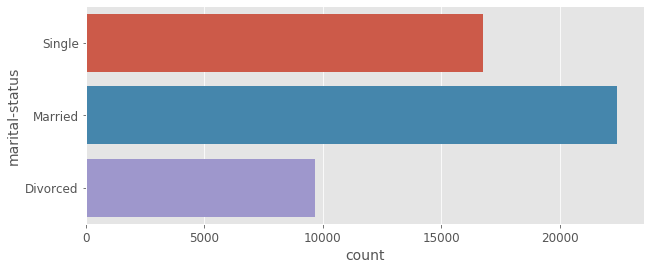

In [29]:
fig = plt.figure(figsize=(10,4)) 
sns.countplot(y="marital-status", data=df);plt.show()

### Feature: Occupation

In [30]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [31]:
df['occupation'][df['occupation'] == ' Adm-clerical'] =  'Admin'
df['occupation'][df['occupation'] == ' Exec-managerial'] = 'Office Labour'
df['occupation'][df['occupation'] == ' Handlers-cleaners'] = 'Manual Labour'
df['occupation'][df['occupation'] == ' Prof-specialty'] = 'Professional'
df['occupation'][df['occupation'] == ' Other-service'] = 'Service'
df['occupation'][df['occupation'] == ' Sales'] ='Service'
df['occupation'][df['occupation'] == ' Craft-repair'] = 'Manual Labour'
df['occupation'][df['occupation'] == ' Transport-moving'] = 'Manual Labour'
df['occupation'][df['occupation'] == ' Farming-fishing'] = 'Manual Labour'
df['occupation'][df['occupation'] == ' Machine-op-inspct'] = 'Manual Labour'
df['occupation'][df['occupation'] == ' Tech-support'] = 'Office Labour'
df['occupation'][df['occupation'] == ' ?'] ='Unknown'
df['occupation'][df['occupation'] == ' Protective-serv'] = 'Military'
df['occupation'][df['occupation'] == ' Armed-Forces'] = 'Military'
df['occupation'][df['occupation'] == ' Priv-house-serv'] = 'Service'

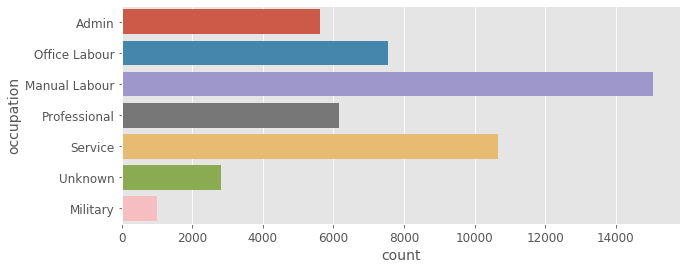

In [32]:
fig = plt.figure(figsize=(10,4)) 
sns.countplot(y="occupation", data=df);plt.show()

### Feature: Relationship

In [33]:
df['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [34]:
df['relationship'][df['relationship'] == ' Not-in-family'] = 'Not In Family'
df['relationship'][df['relationship'] == ' Husband'] = 'Husband'
df['relationship'][df['relationship'] == ' Wife'] = 'Wife'
df['relationship'][df['relationship'] == ' Own-child'] = 'Child'
df['relationship'][df['relationship'] == ' Unmarried'] = 'Unmarried'
df['relationship'][df['relationship'] == ' Other-relative'] = 'Other Relative'

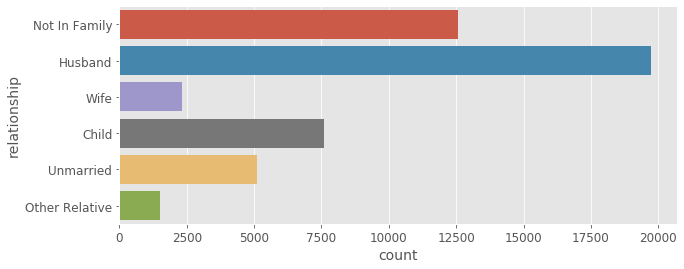

In [35]:
fig = plt.figure(figsize=(10,4)) 
sns.countplot(y="relationship", data=df);plt.show()

### Feature: Race

In [36]:
df['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [37]:
# Remove white space at the beginning of words
df['race'] = df['race'].str.lstrip()

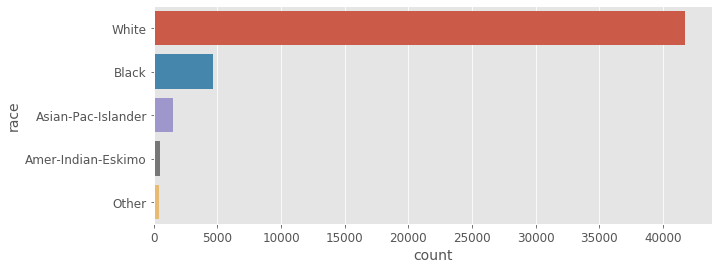

In [38]:
fig = plt.figure(figsize=(10,4)) 
sns.countplot(y="race", data=df);plt.show()

### Feature: Sex

In [39]:
# Remove white space at the beginning of words
df['sex'] = df['sex'].str.lstrip()

### Feature: Capital gain, Capital lost

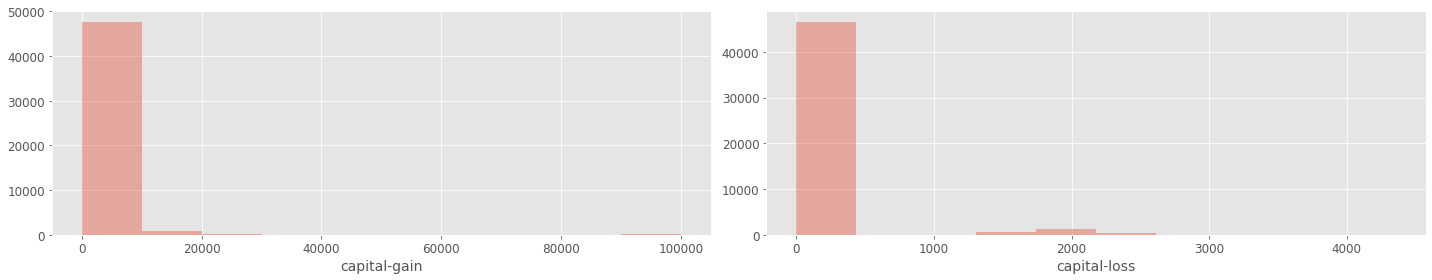

In [40]:
fig = plt.figure(figsize=(20,4)) 
plt.subplot(1, 2, 1)
sns.distplot(df['capital-gain'],bins=10,kde=False)
plt.subplot(1, 2, 2)
sns.distplot(df['capital-loss'],bins=10,kde=False)
plt.tight_layout()
plt.show()

In [41]:
df['capital-gain'] = pd.cut(df['capital-gain'], 5)
df['capital-loss'] = pd.cut(df['capital-loss'], 5)

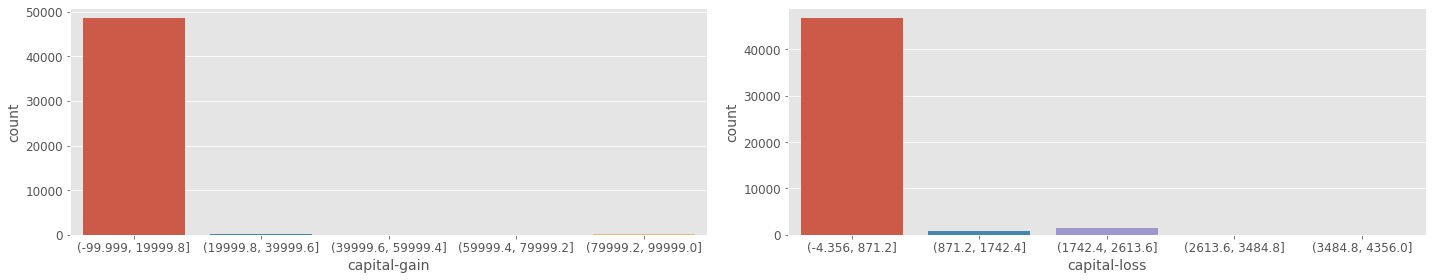

In [42]:
fig = plt.figure(figsize=(20,4)) 
plt.subplot(1, 2, 1)
sns.countplot(df['capital-gain'])
plt.subplot(1, 2, 2)
sns.countplot(df['capital-loss'])
plt.tight_layout()
plt.show()

### Feature: Hours per week

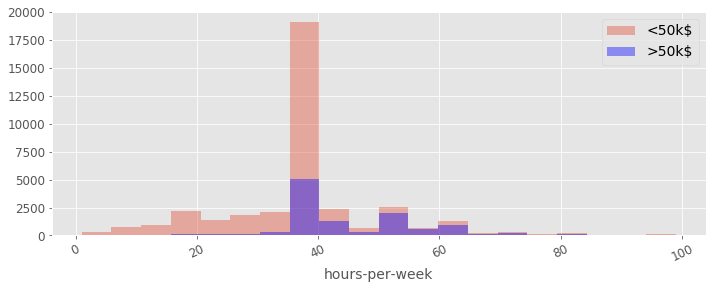

In [43]:
# df['hours-per-week'] = pd.cut(df['hours-per-week'], 10)
fig = plt.figure(figsize=(10,4)) 
sns.distplot(df['hours-per-week'][df['income']==0],bins=20,kde=False,label='<50k$')
sns.distplot(df['hours-per-week'][df['income']==1],bins=20,color='b',kde=False,label='>50k$')
plt.legend(fontsize=14)
plt.tight_layout();plt.xticks(rotation=25)
plt.show()

### Feature: Native country

In [44]:
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [45]:
# Remove white space at the beginning of words
df['native-country'] = df['native-country'].str.lstrip()

In [46]:
# We have 'native_country' columns with more than 20 columns, but we can devide it into native country :'United-States' and 'others'
# Let 's do this first and after that we can deal with all the low cardinality columns at the same time
df['native-country'] = [ 'United-States' if name == 'United-States' else 'Others' for name in df['native-country'] ]

In [47]:
df['native-country'].unique()

array(['United-States', 'Others'], dtype=object)

In [48]:
# Create a copy of dataframe as a checkpoint
df_plus = df.copy()

<a id="2.1c"></a>

### C. Analysze by visualizing relation of combined features

### Combined features: Effect of work class to income by country and gender

In [49]:
df_plus['Workclass'].unique()

array(['Government sector', 'Self employment', 'No information',
       'Not Working'], dtype=object)

In [50]:
workclass_order = ['Not Working','No information','Self employment', 'Government sector']

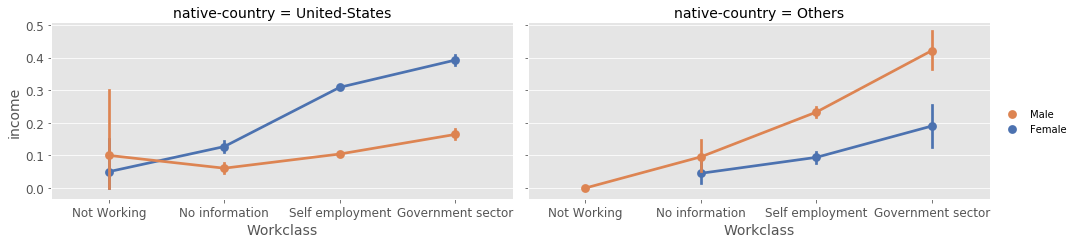

In [51]:
g = sns.FacetGrid(df_plus, col='native-country', size=3.5, aspect = 2)
g.map(sns.pointplot, 'Workclass', 'income','sex', palette='deep', order = workclass_order)
g.add_legend()
plt.show()

### Combined features: Effect of education to income by country and gender

In [52]:
edu_order = ['Dropout', 'High school', 'Associate','Bachelors', ' Masters', 'Doctorate', 'Professor School']

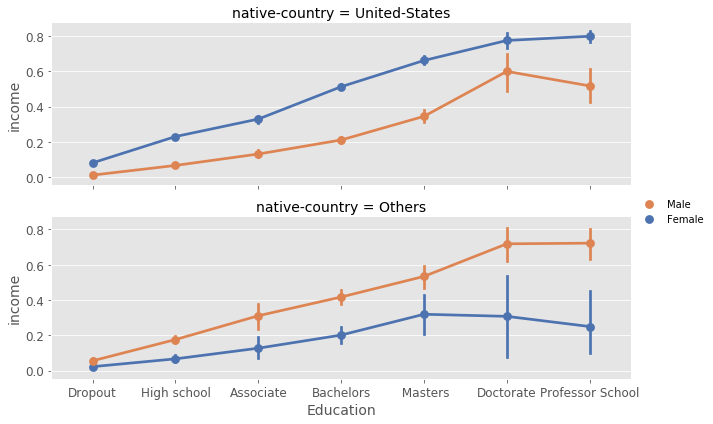

In [53]:
grid = sns.FacetGrid(df_plus, row='native-country', size=3, aspect=3)
grid.map(sns.pointplot, 'Education', 'income','sex',palette='deep',order=edu_order)
grid.add_legend()

### Combined features: Effect of education to income by marital status and gender

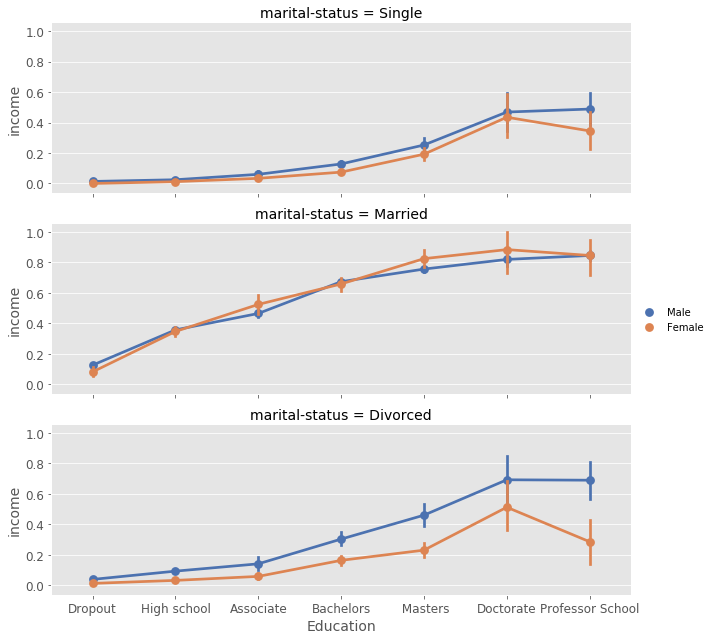

In [54]:
g = sns.FacetGrid(df_plus, row='marital-status', size = 3, aspect = 3)
g.map(sns.pointplot, 'Education', 'income','sex', palette='deep', order=edu_order)
g.add_legend()
plt.show()

### Combined features: Effect of race to income by country and gender

In [55]:
race_order = ['Other','Amer-Indian-Eskimo', 'Black','Asian-Pac-Islander','White']

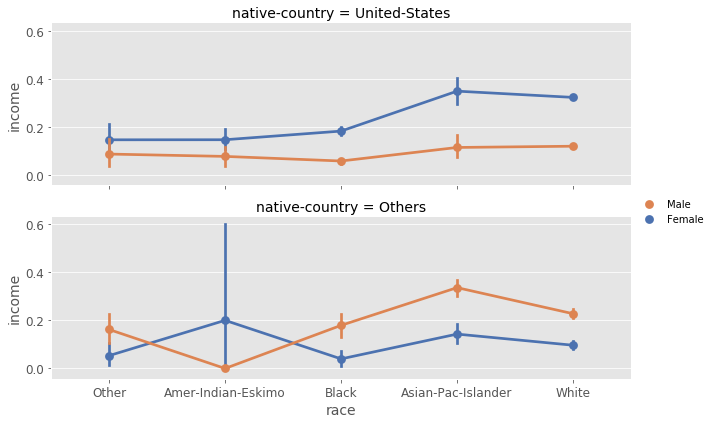

In [56]:
g = sns.FacetGrid(df_plus, row='native-country', size=3, aspect = 3)
g.map(sns.pointplot, 'race', 'income','sex', palette='deep',order=race_order)
g.add_legend()
plt.show()

### Combined features: Historical trends of education, working hours per week and age affect to income by gender

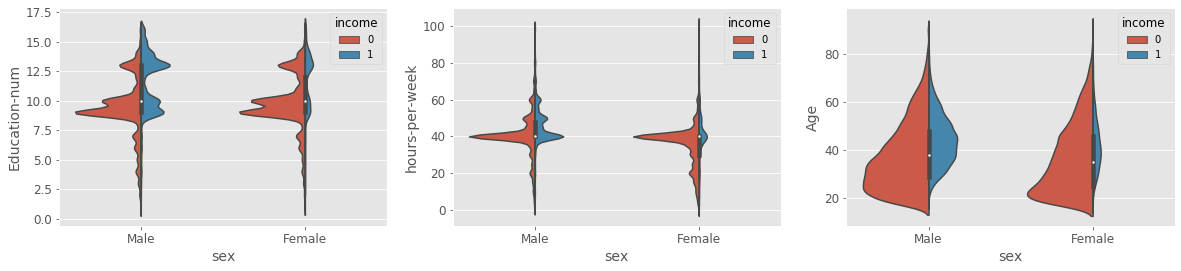

In [57]:
fig = plt.figure(figsize=(20,4)) 
plt.subplot(1, 3, 1)
sns.violinplot(x='sex', y='Education-num', hue='income', data=df_plus, split=True, scale='count')

plt.subplot(1, 3, 2)
sns.violinplot(x='sex', y='hours-per-week', hue='income', data=df_plus, split=True, scale='count')

plt.subplot(1, 3, 3)
sns.violinplot(x='sex', y='Age', hue='income', data=df_plus, split=True, scale='count')

<a id="2.2"></a>

## 2.2. Data cleaning

**Data cleaning:** to clean our data, and we will need to deal with:

**A. Data types**

There are 2 main data types:
- Numeric
- Categorical:
    - Nominal, categorical data but there is no correlation or order in the data. E.g. green-red-blue
    - Ordinal, data with frequency or order. E.g. low - high - medium
    
> Machine learning model can only handle numeric features. We must convert categorical and ordinal features into numeric features.


**B. Outlier detection**

An outlier is a data point that differs significantly from other observations [[2]](https://en.wikipedia.org/wiki/Outlier). Outliers are ussually defined as the data points which lie out of 1.5 times of interquantile range (IQR). 

There are serveral ways to find the outliers: 

- Using scatter plots: to observe the extreme points which lie very far away from other observations
- Using boxplot: can determine the points lie out of the $1.5xIQR$ (Interquantitle range), or we can determine the IQR by `numpy-percentile function`.
- Using Z score: the data points which are greater or smaller than: $2.698\sigma$. Where $\sigma$ is the standard deviation of a feature in dataset.


**C. Missing values**

In our dataset we did not find any missing values, however due to cleaning steps, it intentionally generates some missing values. Our task is to remove or fill them in.

> The problem if we remove all the missing values is lost of information. The better way to deal with missing values is filling them by mean, median, a highest frequency value of given feature or other meaningful values.



<a id='2.2a'></a>
### A. Dealing with data types

In this section, we have to convert all categorical feature (nominal and ordinal) into numeric features.
- For nominal features: we can use `Pandas Get_dummy` or `Sklearn One-Hot-Encoding` to transform a nominal feature into a set of dummy features which represent a unique category. Each unique category is represented by 1 if that observation belongs to that category, otherwise 0.
- For ordinal features: we can use `Sklearn Label Encoding` to convert into a numeric features. E.g. High-Medium-Low to 3-2-1 (the order is important and affect to our model)


In [58]:
# Decide which categorical variables use to combine 
print("Categorical Features:")
print("="*50)
for col_name in df_plus.columns:
    if df[col_name].dtypes == 'object':
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))
print("="*50)

Categorical Features:
Feature 'Workclass' has 4 unique categories
Feature 'Education' has 7 unique categories
Feature 'marital-status' has 3 unique categories
Feature 'occupation' has 7 unique categories
Feature 'relationship' has 6 unique categories
Feature 'race' has 5 unique categories
Feature 'sex' has 2 unique categories
Feature 'native-country' has 2 unique categories


In [59]:
# Create a list of features to dummy
to_dummy_list = ['Workclass','Education','marital-status','occupation','relationship','race','sex','native-country']

In [60]:
# Function to dummy all the categorical variables used for modeling
def dummy_df(df, to_dummy_list):
    for x in to_dummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

In [61]:
df_todummy = dummy_df(df, to_dummy_list)
df_todummy.head()

,Age,Final weight,Education-num,capital-gain,capital-loss,hours-per-week,income,Workclass_Government sector,Workclass_No information,Workclass_Not Working,Workclass_Self employment,Education_ Masters,Education_Associate,Education_Bachelors,Education_Doctorate,Education_Dropout,Education_High school,Education_Professor School,marital-status_Divorced,marital-status_Married,marital-status_Single,occupation_Admin,occupation_Manual Labour,occupation_Military,occupation_Office Labour,occupation_Professional,occupation_Service,occupation_Unknown,relationship_Child,relationship_Husband,relationship_Not In Family,relationship_Other Relative,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native-country_Others,native-country_United-States
0,39,77516,13,"(-99.999, 19999.8]","(-4.356, 871.2]",40,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1
1,50,83311,13,"(-99.999, 19999.8]","(-4.356, 871.2]",13,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1
2,38,215646,9,"(-99.999, 19999.8]","(-4.356, 871.2]",40,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1
3,53,234721,7,"(-99.999, 19999.8]","(-4.356, 871.2]",40,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
4,28,338409,13,"(-99.999, 19999.8]","(-4.356, 871.2]",40,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0


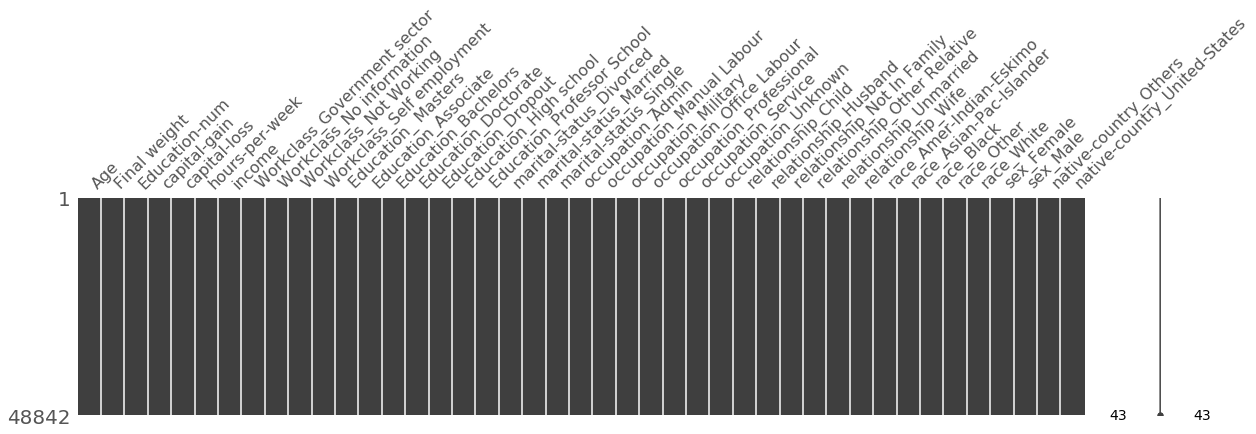

In [62]:
# Check the missing values in to_dummy dataset
# Missingno is beautiful library to check missing values
missingno.matrix(df_todummy, figsize = (20,4));plt.show()

In [63]:
# Another way to check missing values
df_todummy.isnull().sum().sort_values(ascending=False).head()

native-country_United-States    0
Workclass_Self employment       0
marital-status_Divorced         0
Education_Professor School      0
Education_High school           0
dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             48842 non-null  int64   
 1   Workclass       48842 non-null  object  
 2   Final weight    48842 non-null  int64   
 3   Education       48842 non-null  object  
 4   Education-num   48842 non-null  int64   
 5   marital-status  48842 non-null  object  
 6   occupation      48842 non-null  object  
 7   relationship    48842 non-null  object  
 8   race            48842 non-null  object  
 9   sex             48842 non-null  object  
 10  capital-gain    48842 non-null  category
 11  capital-loss    48842 non-null  category
 12  hours-per-week  48842 non-null  int64   
 13  native-country  48842 non-null  object  
 14  income          48842 non-null  int64   
dtypes: category(2), int64(5), object(8)
memory usage: 4.9+ MB


In [65]:
# label encoding for 'capital-gain' & 'capital-lost'

In [66]:
label_end_cols = ['capital-gain','capital-loss']

In [67]:
from sklearn.preprocessing import LabelEncoder
df_todummy[label_end_cols] = df_todummy[label_end_cols].apply(LabelEncoder().fit_transform)

In [68]:
df_todummy.head()

,Age,Final weight,Education-num,capital-gain,capital-loss,hours-per-week,income,Workclass_Government sector,Workclass_No information,Workclass_Not Working,Workclass_Self employment,Education_ Masters,Education_Associate,Education_Bachelors,Education_Doctorate,Education_Dropout,Education_High school,Education_Professor School,marital-status_Divorced,marital-status_Married,marital-status_Single,occupation_Admin,occupation_Manual Labour,occupation_Military,occupation_Office Labour,occupation_Professional,occupation_Service,occupation_Unknown,relationship_Child,relationship_Husband,relationship_Not In Family,relationship_Other Relative,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native-country_Others,native-country_United-States
0,39,77516,13,0,0,40,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1
1,50,83311,13,0,0,13,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1
2,38,215646,9,0,0,40,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1
3,53,234721,7,0,0,40,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
4,28,338409,13,0,0,40,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0


<a id='2.2b'></a>
### B. Outlier detection

In [69]:
df_outlier = df_todummy.copy()

In [70]:
print("Numerical Features:")
print("="*20)
for col_name in df.columns:
    if df[col_name].dtypes != 'object':
        print(col_name)
print("="*20)

Numerical Features:
Age
Final weight
Education-num
capital-gain
capital-loss
hours-per-week
income


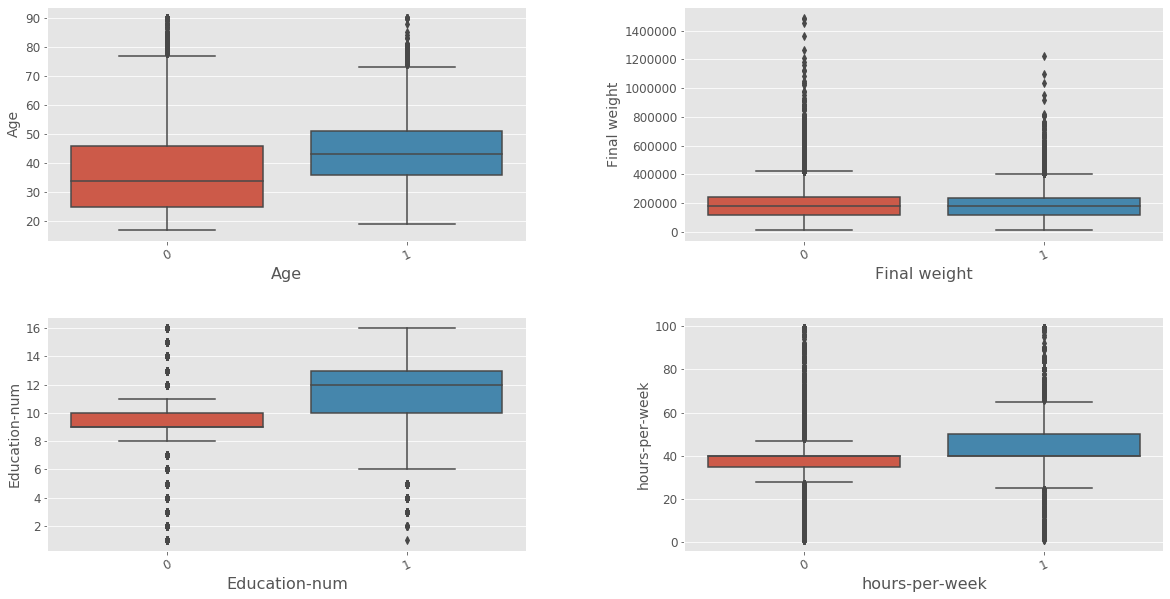

In [71]:
# Using boxplot to quickly check the number of outliers
find_outlier_cols = ['Age', 'Final weight','Education-num','hours-per-week']
n_cols = 2
n_rows = 2
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20,10))
fig.subplots_adjust(wspace=0.33, hspace=0.33)
for row in range(n_rows):
    for col in range(n_cols):
        plt.sca(ax[row,col])
        index = col + row*n_cols
        sns.boxplot(x=df_outlier['income'], y=df_outlier[find_outlier_cols[index]])
        plt.xlabel(find_outlier_cols[index],fontsize=16)
        plt.xticks(rotation=25)
# plt.tight_layout()        
plt.show()

In [72]:
# Using scipy to calculate z-score and revome the outliers
from scipy import stats
for col in find_outlier_cols:
    df_outlier[col] = df_outlier[col][(np.abs(stats.zscore(df_outlier[col])) < 3)]

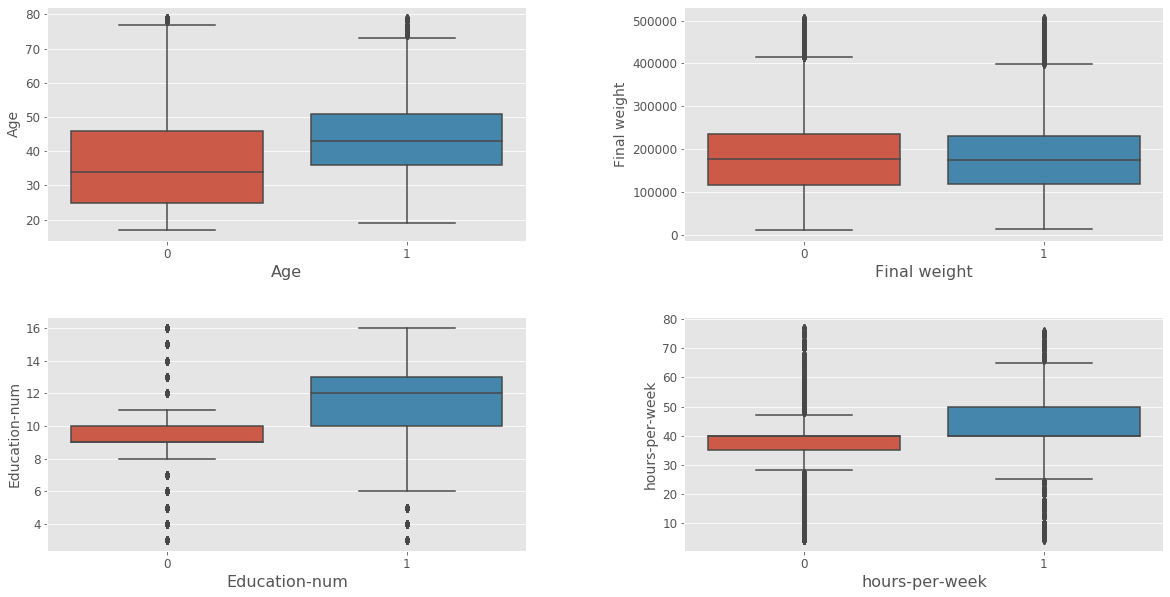

In [73]:
# Using boxplot to quickly re-check the number of outliers
n_cols = 2
n_rows = 2
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20,10))
fig.subplots_adjust(wspace=0.33, hspace=0.33)
for row in range(n_rows):
    for col in range(n_cols):
        plt.sca(ax[row,col])
        index = col + row*n_cols
        sns.boxplot(x=df_outlier['income'], y=df_outlier[find_outlier_cols[index]])
        plt.xlabel(find_outlier_cols[index],fontsize=16)
plt.show()

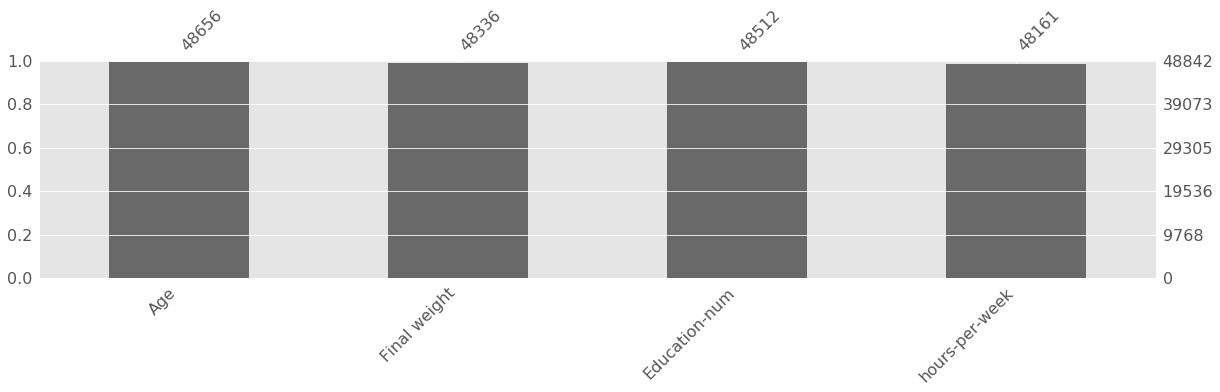

In [74]:
# How many missing values are there in our dataset?
missingno.bar(df_outlier[find_outlier_cols], figsize = (20,4))
plt.show()

In [75]:
df_outlier.isnull().sum().sort_values(ascending=False)[:6]

hours-per-week             681
Final weight               506
Education-num              330
Age                        186
Education_ Masters           0
marital-status_Divorced      0
dtype: int64

<a id='2.2c'></a>
### C. Missing values

In [76]:
df_missvalues = df_outlier.copy()

In [77]:
# Impute missing values using Imputer in sklearn
from sklearn.impute import SimpleImputer

In [78]:
# Impute missing values using Imputer 
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(df_missvalues)
df_missvalues = pd.DataFrame(data=imp.transform(df_missvalues) , columns=df_missvalues.columns)

In [79]:
# Re-check missing values agian
df_missvalues.isnull().sum().sort_values(ascending=False)[:6]

native-country_United-States    0
Workclass_Self employment       0
marital-status_Divorced         0
Education_Professor School      0
Education_High school           0
Education_Dropout               0
dtype: int64

In [80]:
df_missvalues.head()

,Age,Final weight,Education-num,capital-gain,capital-loss,hours-per-week,income,Workclass_Government sector,Workclass_No information,Workclass_Not Working,Workclass_Self employment,Education_ Masters,Education_Associate,Education_Bachelors,Education_Doctorate,Education_Dropout,Education_High school,Education_Professor School,marital-status_Divorced,marital-status_Married,marital-status_Single,occupation_Admin,occupation_Manual Labour,occupation_Military,occupation_Office Labour,occupation_Professional,occupation_Service,occupation_Unknown,relationship_Child,relationship_Husband,relationship_Not In Family,relationship_Other Relative,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native-country_Others,native-country_United-States
0,39.0,77516.0,13.0,0.0,0.0,40.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,50.0,83311.0,13.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,38.0,215646.0,9.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,53.0,234721.0,7.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,28.0,338409.0,13.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [81]:
df_preprocessed = df_missvalues.copy()

In [82]:
# Final weight and Age have large sclae compared to other features, 
# The large difference in scale is not good for machine learning algorithms
# Therefore, centering Final Weight and Age features might be help to increase the performance of our machine learning models
# Actually we can use StandardScaler() or MinMaxScaler() in sklearn to automatically scale data, 
# However, I would like to use my own funtion.

def normalization_data(X):
    """
    Normalize data by minus mean and divide to standard deviation
    """
    return ((X- np.mean(X))/ np.std(X))
            
df_preprocessed["Final weight"] = normalization_data(df_preprocessed["Final weight"])
df_preprocessed["Age"] = normalization_data(df_preprocessed["Age"])

# We can also try to scale other features to experiment what can change with the performance of our models,
# However in this project, I restricted only two features

<a id='part3'></a>
## 3. Model building

Gennerally, we can use sklearn train_test_split() function to split data into train and test data, however in this dataset we already have train and test data with a randomness. Therefore we can simply seperate data by original dataset order.

In [84]:
train = df_preprocessed.loc[:32560,:]
test = df_preprocessed.loc[32560:,:]

In [85]:
X_train = train.drop(['income'], axis=1)
y_train = train['income'].astype('int64')
X_test  = test.drop(['income'], axis=1)
y_test  = test['income'].astype('int64')

In [86]:
print(X_train.shape)
print(X_test.shape)

(32561, 42)
(16282, 42)


In [87]:
print(y_train.shape)
print(y_test.shape)

(32561,)
(16282,)


<a id='3.1'></a>
### 3.1. Selecting models

There are many estimators (machine learning algorithms) to choose from, however this problem is supervised learning plus classification, and therefore we can narrow the choice of models. In this project I will choose 6 machine learning models which are used frequenly for classification problem.

    (1) Logistic Regression
    (2) Support Vector Machines
    (3) Decision Tree
    (4) Random Forrest
    (5) KNN or K-nearest neighbors
    (6) Artificial NN: perceptron model

In [102]:
# Machine learning 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron

# Grid and Random Search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, plot_roc_curve, classification_report

In [89]:
# Quickly build a simple model using Logistic Regression
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
y_predict = log_clf.predict(X_test)

cv_scores = cross_val_score(log_clf, X_train, y_train, cv = 5)
print(f"Cross validation score: {np.mean(cv_scores)} +- {np.std(cv_scores)}")
print(f"Accuracy score: {np.mean(y_predict == y_test):.2f}")

Cross validation score: 0.8339426278797537 +- 0.004555377585982572
Accuracy score: 0.84


In [90]:
coeff_df = pd.DataFrame(X_train.columns.delete(0))
coeff_df.columns = ["Features"]
coeff_df["Correlation"] = pd.Series(log_clf.coef_[0])

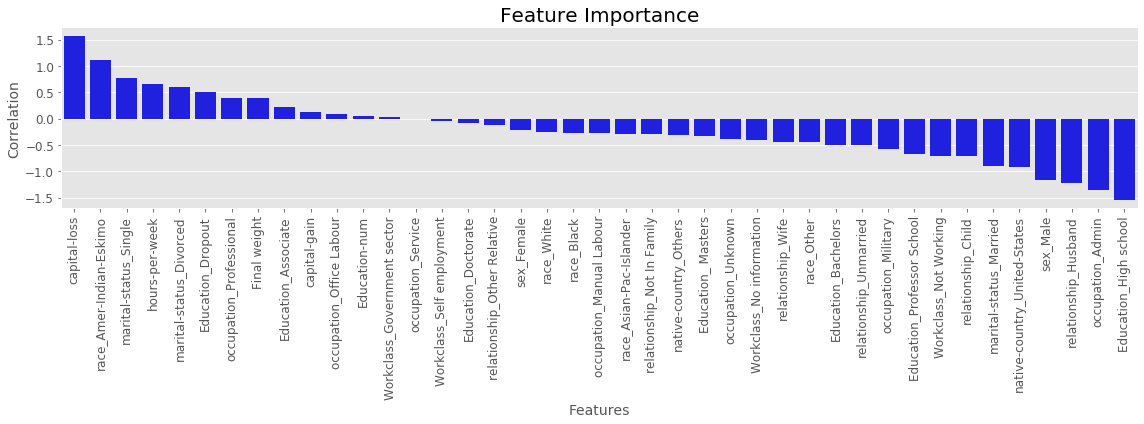

In [91]:
plt.figure(figsize=(16,6))
sns.barplot(x="Features", y="Correlation", data= coeff_df.sort_values(by="Correlation",ascending=False), color="blue")
plt.xticks(rotation=90)
plt.title("Feature Importance", fontsize=20)
plt.tight_layout()
plt.show()

In [92]:
# Not all the features have high coefficient, my question is that do we need all the features ?
# Additionally, in some cases such a large set of features can cause overfitting and also slow computing
# I will use sklearn feature_selection to automatically select the most important features
import sklearn.feature_selection

select = sklearn.feature_selection.SelectKBest(k=30)
selected_features = select.fit(X_train, y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [df_todummy.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]

print(colnames_selected)

['Age', 'Education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'Workclass_Self employment', 'Education_Associate', 'Education_Bachelors', 'Education_Doctorate', 'Education_Dropout', 'Education_High school', 'Education_Professor School', 'marital-status_Divorced', 'marital-status_Married', 'marital-status_Single', 'occupation_Admin', 'occupation_Military', 'occupation_Office Labour', 'occupation_Professional', 'occupation_Service', 'occupation_Unknown', 'relationship_Child', 'relationship_Husband', 'relationship_Not In Family', 'relationship_Other Relative', 'relationship_Unmarried', 'race_Asian-Pac-Islander', 'race_Other', 'race_White', 'sex_Female']


In [93]:
# Let's check if we can improve score by eliminating unimportant features
log_clf_selected = LogisticRegression()
log_clf_selected.fit(X_train_selected, y_train)
y_predict = log_clf_selected.predict(X_test_selected)

cv_scores = cross_val_score(log_clf_selected, X_train_selected, y_train, cv = 5)
print(f"Cross validation score: {np.mean(cv_scores)} +- {np.std(cv_scores)}")
print(f"Test score: {np.mean(y_predict == y_test):.2f}")

Cross validation score: 0.8336661632320315 +- 0.004007977617107711
Test score: 0.83


In [94]:
# We can observe that after reduce some features, the accuracy decreases.
# It means we lost necessary information after eliminating features
# And therefore, it is better to keep all the features for better results

In [103]:
# Put models in a dic
models = {"Logistic Regression": LogisticRegression(),
    "Support Vector Machines": SVC(gamma="scale"),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forrest":RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "perceptron model": Perceptron()}

# Create a function to fit and scoring the model

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    A function to fit training data,
    and evaluate the models by testing data and scoring them
    X_train, X_test: training and testing data
    y_train, y_test: training and testing labels
    """
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_cv_score = cross_val_score(model, X_train, y_train, cv=5)
        model_scores[name] = np.mean(model_cv_score).round(2)
    return model_scores

In [104]:
start = time.time() 
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
end = time.time()
print(f"Calculation time: {(end-start):.4f}s")

Calculation time: 246.8419s


In [105]:
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.T

,Accuracy
Logistic Regression,0.83
Support Vector Machines,0.83
Decision Tree,0.78
Random Forrest,0.82
KNN,0.82
perceptron model,0.80


<a id='3.2'></a>
### 3.2. Hyperparameter tuning

We can observe that among many models Logistic Regression and Support Vector Machines have the highest cross validation score on traning data and then followed by KNN and Random Forrest. The accuracy of our model is about 83%.

The current results are using simple models. So far, we have used the default hyper-parameters in Sklearn. We can use grid searching to find the best combination of hyper-parameters for each models. Depending on the number of hyper parameters' combination, we can use both GridSearchCV or RandomizedSearchCV to find the best hyper parameters. RandomizedSearchCV helps us to reduce the calculation time by choice random combinations. I will use both two methods to tune hyper-parameters.

**(1) Logistic Regression** 

In [98]:
log_reg_params = {
    "C": np.logspace(-4,4,20),
    "penalty":["l1","l2"],
    "solver": ["liblinear","‘lbfgs’"]}

log_clf_grid = GridSearchCV(LogisticRegression(), log_reg_params, cv = 5, verbose=True)
log_clf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  2.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 2.6...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
      

In [99]:
print(f"Best parameters: {log_clf_grid.best_params_}")
y_predict = log_clf_grid.predict(X_test)
print(f"Accuracy score of logistic regression model: {accuracy_score(y_test, y_predict):.2f}")

Best parameters: {'C': 545.5594781168514, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy score of logistic regression model: 0.84


**(2) Random Forrest**

In [107]:
rnd_clf_params = {'max_depth': [10, 20, 25, 30, 35, 40],
                 'n_estimators': np.arange(10,1000, 50),
                 "min_samples_split": np.arange(2,20,2),
                 "min_samples_leaf":np.arange(1,20,2)}
rnd_clf_grid = RandomizedSearchCV(RandomForestClassifier(), rnd_clf_params, cv = 5, verbose=True)
rnd_clf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  7.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [165]:
print(f"Best parameters: {rnd_clf_grid.best_params_}")
y_predict_rnd = rnd_clf_grid.best_estimator_.predict(X_test)
print(f"Accuracy score of random forrest model: {accuracy_score(y_test, y_predict_rnd):.2f}")

Best parameters: {'n_estimators': 460, 'min_samples_split': 10, 'min_samples_leaf': 9, 'max_depth': 30}
Accuracy score of random forrest model: 0.84


**(3) Support Vector Machine**

In [110]:
from scipy.stats import reciprocal, uniform

svm_clf_params = {"gamma": reciprocal(0.001,0.1),
                 "C": uniform(1,10)}
svm_clf_grid = RandomizedSearchCV(SVC(), svm_clf_params, cv = 5, verbose=True)
svm_clf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 32.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020B15B96BC8>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020B16208608>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=True)

In [111]:
print(f"Best parameters: {svm_clf_grid.best_params_}")
y_predict_svm = svm_clf_grid.predict(X_test)
print(f"Accuracy score of Support Vector Machine model: {accuracy_score(y_test, y_predict_svm):.2f}")

Best parameters: {'C': 4.064804578167343, 'gamma': 0.03465465950179434}
Accuracy score of random forrest model: 0.84


**(4) KNN**

In [113]:
knn_clf_params = {"n_neighbors": np.arange(1,30,1),
                 "leaf_size": np.arange(1,50,1),
                 "p":[1,2]}
knn_clf_grid = RandomizedSearchCV(KNeighborsClassifier(), knn_clf_params, cv=5, verbose=True)
knn_clf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'leaf_size': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
             

In [114]:
print(f"Best parameters: {knn_clf_grid.best_params_}")
y_predict_knn = knn_clf_grid.predict(X_test)
print(f"Accuracy score of KNN model: {accuracy_score(y_test, y_predict_knn):.2f}")

Best parameters: {'p': 1, 'n_neighbors': 25, 'leaf_size': 38}
Accuracy score of KNN model: 0.84


<a id='3.3'></a>
### 3.3. Evaluate results and choose the best model

For classification problem, besides the accuracy score, there are many other metrics which help us to better understand how did the model predict well by looking at false and true predicted rate.
In above results, aftere tunning hyper parameters, all the model show about 84% of accuracy. Therefore, it is hard to only rely on accuracy metric. In order to choose the best model, I will use a classification report, and ROC (receiver operating characteristic) curve.

By looking at classification report, we can understand both precision, recall and f1-score (harmonic mean of precision and recall). By looking at ROC curve, we can understand the true positive rate against the false positive rate, and area under the curve (AUC). In this problem, I aim to find a better classifier with higher ROC AUC.

In [122]:
predicted_results = {"Logistic Regression": y_predict,
                    "Random Forrest": y_predict_rnd,
                    "Support Vector Machine": y_predict_svm,
                    "KNN": y_predict_knn}
for model,predicted_value in predicted_results.items():
    print(f"Classification report of {model}: ")
    print(classification_report(y_test, predicted_value))
    print("="*60)

Classification report of Logistic Regression: 
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.70      0.55      0.62      3847

    accuracy                           0.84     16282
   macro avg       0.78      0.74      0.76     16282
weighted avg       0.83      0.84      0.83     16282

Classification report of Random Forrest: 
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.72      0.55      0.63      3847

    accuracy                           0.84     16282
   macro avg       0.80      0.74      0.76     16282
weighted avg       0.84      0.84      0.84     16282

Classification report of Support Vector Machine: 
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.72      0.55      0.63      3847

    accuracy                           0.84

In [211]:
# From the classification reports, all the models have quite equivalent performance
# But Random Forrest and Support Vector Machine perform better in term of overal f1-score
# These two models will be chosen to evaluate ROC AUC.

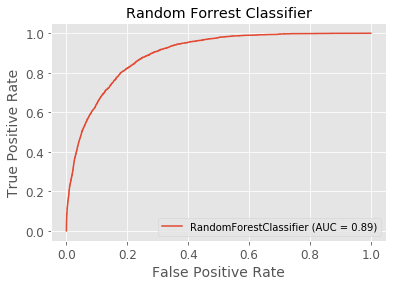

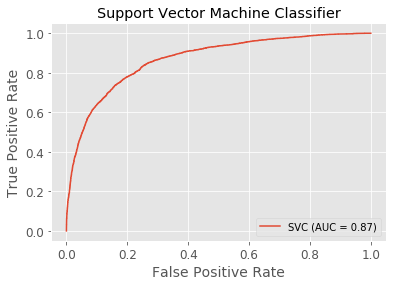

In [161]:
plot_roc_curve(rnd_clf_grid.best_estimator_, X_test, y_test)
plt.title("Random Forrest Classifier")
plot_roc_curve(svm_clf_grid.best_estimator_, X_test, y_test)
plt.title("Support Vector Machine Classifier")
plt.show()

<a id="part4"></a>

# 4. Conclusion

In this project, we successfully build a machine learning model with accuracy and f1-score are **84%**. The best model which performed the best on this data set is **Random Forrest Classifier** with the ROC AUC of **89%**. 

What we have worked through all pre-modelling steps and building machine learning steps has been a series of experimentation on this dataset. And we can keep try and fail to explore more to improve the performance of machine learning models for fitting well to the requirement of the business problem. 

<a id="ref"></a>

## References

1.  Armand Ruiz: "The 80/20 data science dilemma", 2017
    https://www.infoworld.com/article/3228245/the-80-20-data-science-dilemma.html

2. Outlier - wikipedia
    https://en.wikipedia.org/wiki/Outlier